In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

#### Como mencionado na parte exploratória dos dados, aqui vamos usar a função np.log nas variáveis "income" e "gdpp"

In [70]:
# leitura e exclusão de Myanmar
country = pd.read_csv("../data/Country-data.csv", index_col='country')
country.drop(labels="Myanmar", axis=0, inplace=True)

In [71]:
# copia do DF e aplicação da função np.log em duas variáveis
country_log_2 = country.copy()
country_log_2['income'] = np.log(country_log_2['income'])
country_log_2['gdpp'] = np.log(country_log_2['gdpp'])

In [72]:
# definição de variáveis para uso nos modelos
X1 = 'income'
X2 = 'gdpp'
vars = ['income', 'gdpp']

In [73]:
# criação do modelo, fit e predict 
model_2_log = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

model_2_log.fit(country_log_2[vars])
country_log_2['clusters'] = model_2_log.predict(country_log_2[vars])

In [74]:
# clusters encontrados
cluster_0_2 = country_log_2[country_log_2['clusters'] == 0]
cluster_1_2 = country_log_2[country_log_2['clusters'] == 1]
cluster_2_2 = country_log_2[country_log_2['clusters'] == 2]

# visualização do tamanho
print(f"""Cluster 0: {len(cluster_0_2)}
Cluster 1: {len(cluster_1_2)}
Cluster 2: {len(cluster_2_2)}""")

Cluster 0: 75
Cluster 1: 49
Cluster 2: 42


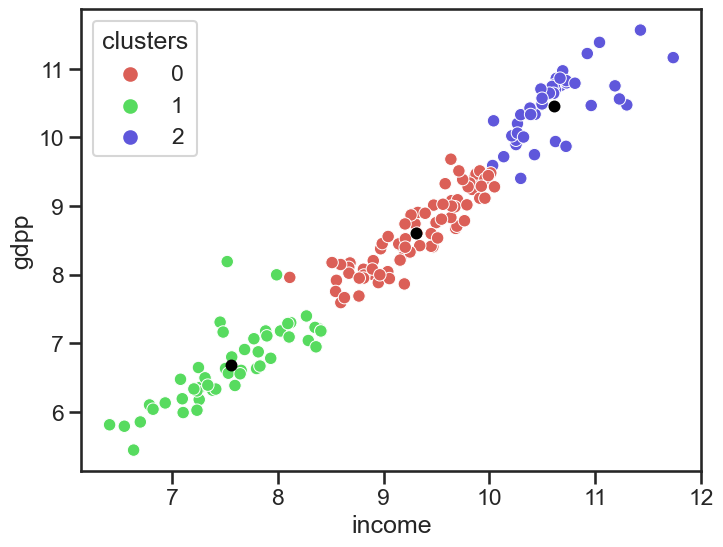

In [75]:
# centroids do modelo
centroids_2 = model_2_log.cluster_centers_

#plot dos clusters e seus centroids
plt.figure(figsize = (8,6))
sns.scatterplot(data = country_log_2,
                x = X1,
                y = X2,
                hue = country_log_2['clusters'],
                palette = sns.color_palette('hls', 3))
plt.scatter(centroids_2[:,0],
            centroids_2[:,1],
            c = 'black',
            s=50)
plt.show()

In [76]:
# cálculo das distancias para o centroid
cluster_0_2['dist_2'] = (cluster_0_2[X1]-centroids_2[0,0])**2 + (cluster_0_2[X2]-centroids_2[0,1])**2
cluster_1_2['dist_2'] = (cluster_1_2[X1]-centroids_2[0,0])**2 + (cluster_1_2[X2]-centroids_2[0,1])**2
cluster_2_2['dist_2'] = (cluster_2_2[X1]-centroids_2[0,0])**2 + (cluster_2_2[X2]-centroids_2[0,1])**2
index_min_0_2 = cluster_0_2['dist_2'][cluster_0_2['dist_2'] == cluster_0_2['dist_2'].min()].index
index_min_1_2 = cluster_1_2['dist_2'][cluster_1_2['dist_2'] == cluster_1_2['dist_2'].min()].index
index_min_2_2 = cluster_2_2['dist_2'][cluster_2_2['dist_2'] == cluster_2_2['dist_2'].min()].index

In [77]:
print(f"""Os 3 países que representam os cluster com duas variáveis (income e gdpp) com função log são:
Cluster 0: {index_min_0_2[0]}
Cluster 1: {index_min_1_2[0]}
Cluster 2: {index_min_2_2[0]}""")

Os 3 países que representam os cluster com duas variáveis (income e gdpp) com função log são:
Cluster 0: Dominican Republic
Cluster 1: Vanuatu
Cluster 2: Estonia


#### Com o uso da função log em duas variáveis, temos uma melhor distribuição na quantidade de pontos dentro de cada cluster, já que, a distribuição tendem a uma linearidade, resultado da função. Temos ainda dois representantes de países em desenvolvimento (Vanuatu e Rep. Dominicana) e um desenvolvido (Estonia)

_____________________

In [78]:
# análise para ver a melhor opção entre os métodos de linkage para o modelo te clusterização aglomerativa
linkage = ['ward', 'complete', 'average', 'single']
distribuicao =[]
for i in range(0,4):
    model_aglo_log_2 = AgglomerativeClustering(n_clusters=3, linkage=linkage[i]).fit(country_log_2)
    count = model_aglo_log_2.labels_
    distribuicao.append(count)
   
distribuicao = pd.DataFrame(distribuicao)

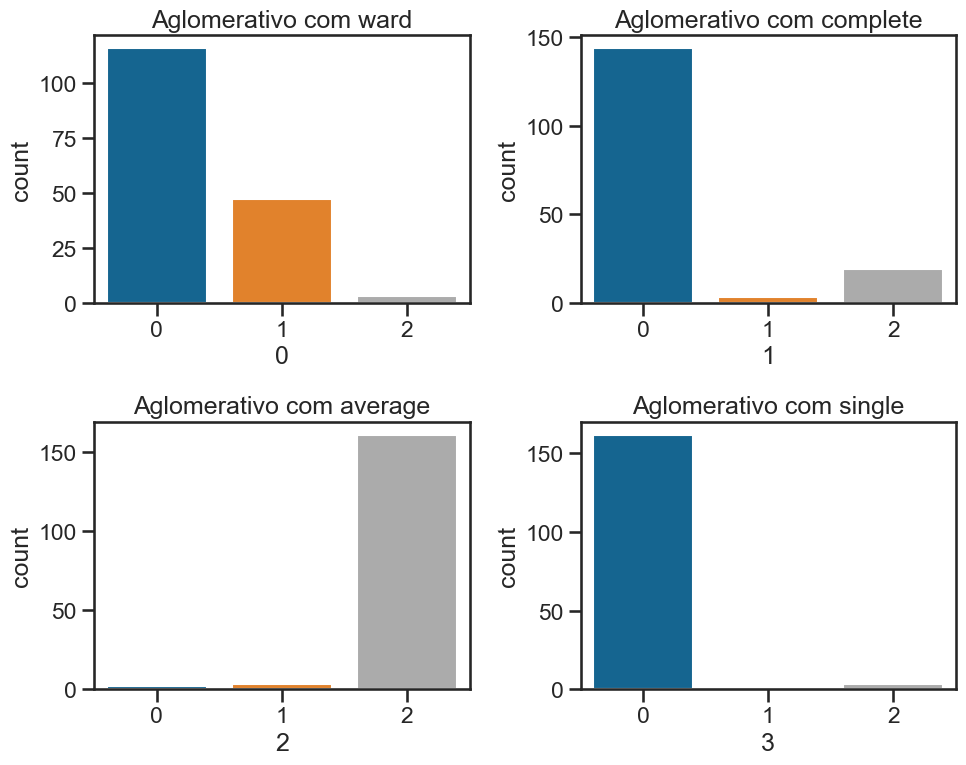

In [79]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
sns.countplot(x=distribuicao.T[0])
ax.set_title('Aglomerativo com ward')

ax = fig.add_subplot(222)
sns.countplot(x=distribuicao.T[1])
ax.set_title('Aglomerativo com complete')

ax = fig.add_subplot(223)
sns.countplot(x=distribuicao.T[2])
ax.set_title('Aglomerativo com average')

ax = fig.add_subplot(224)
sns.countplot(x=distribuicao.T[3])
ax.set_title('Aglomerativo com single')

plt.tight_layout()
plt.show()

#### De acordo com o gráfico acima, podemos ver uma leve melhora no uso do parâmetro "ward" para o algoritmo de clusterização

Text(0, 0.5, 'Distancias')

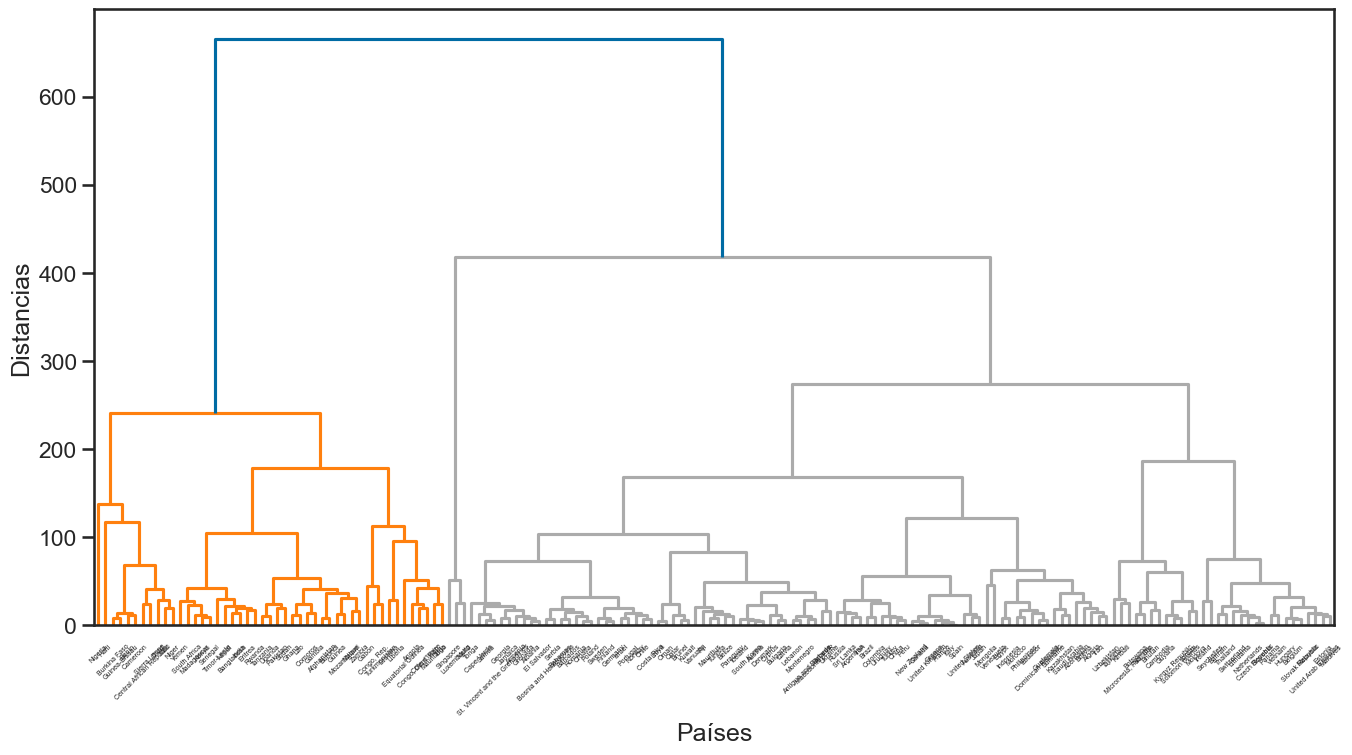

In [80]:
plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

linkage = sch.linkage(country_log_2, method="ward")
dendrogram = sch.dendrogram(linkage, labels=country_log_2.index, leaf_rotation=45)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')

#### De acordo com o dendograma, ainda existem distancias muito grandes entre os clusters, efeito que se deve ao não escalonamento das variáveis. Se compararmos com o modelo original, as distâncias já diminuiram, porém, ainda são grandes.

_____________________

#### Abaixo, vamos analisar os medoids. Ao invés de termos centroids de cada cluster e seus pontos mais próximos, os medoidos são os pontos existentes que representam o centro de cada cluster.

In [81]:
# fit e predict do modelo com 3 clusters
model_medoid_log_2 = KMedoids(n_clusters=3, max_iter=1000, random_state=42)
model_medoid_log_2.fit(country_log_2[vars])
country_log_2['clusters_medoid'] = model_medoid_log_2.predict(country_log_2[vars])

In [82]:
# clusters encontrados
cluster_0 = country_log_2[country_log_2['clusters_medoid'] == 0]
cluster_1 = country_log_2[country_log_2['clusters_medoid'] == 1]
cluster_2 = country_log_2[country_log_2['clusters_medoid'] == 2]

# visualização do tamanho de cada cluster
print(f"""Cluster 0: {len(cluster_0)}
Cluster 1: {len(cluster_1)}
Cluster 2: {len(cluster_2)}""")

Cluster 0: 51
Cluster 1: 67
Cluster 2: 48


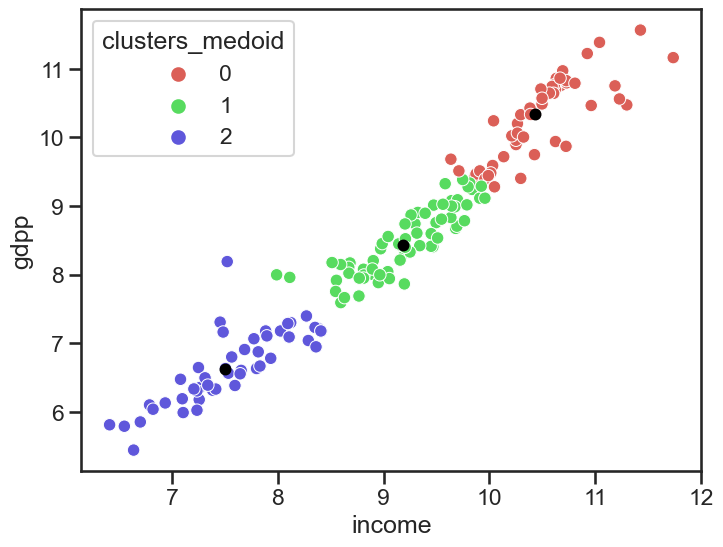

In [83]:
# medoids de cada cluster
medoids = model_medoid_log_2.cluster_centers_

#plot dos clusters e seus medoids
plt.figure(figsize = (8,6))
sns.scatterplot(data = country_log_2,
                x = X1,
                y = X2,
                hue = country_log_2['clusters_medoid'],
                palette = sns.color_palette('hls', 3))
plt.scatter(medoids[:,0],
            medoids[:,1],
            c= 'black',
            s = 50)
plt.show()

In [84]:
# cálculo das distancias para o medoid
cluster_0['dist_2'] = (cluster_0[X1]-medoids[0,0])**2 + (cluster_0[X2]-medoids[0,1])**2
cluster_1['dist_2'] = (cluster_1[X1]-medoids[0,0])**2 + (cluster_1[X2]-medoids[0,1])**2
cluster_2['dist_2'] = (cluster_2[X1]-medoids[0,0])**2 + (cluster_2[X2]-medoids[0,1])**2
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [85]:
print(f"""Os 3 países que representam os cluster nos dados com duas variáveis com a função log são:
Cluster 0: {index_min_0[0]}
Cluster 1: {index_min_1[0]}
Cluster 2: {index_min_2[0]}""")

Os 3 países que representam os cluster nos dados com duas variáveis com a função log são:
Cluster 0: Cyprus
Cluster 1: Seychelles
Cluster 2: Timor-Leste


#### Neste modelo, continuamos com uma diferença entre os países através dos centroids e medoids. A explicação é a mesma dos dados originais, a diferença fica em aqui termos 1 país desenvolvido, e 2 em desenvolvimento.